<a href="https://colab.research.google.com/github/vaishaliraut/DeepLearningDemo/blob/main/BinaryClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Binary Classification

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

### Step 1 : Read the dataset

In [2]:
import pandas as pd
url1 = "https://raw.githubusercontent.com/vaishaliraut/DeepLearningDemo/main/booking_train.csv"
df = pd.read_csv(url1)
df.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0,0
1,1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0,0
2,2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0,0
3,3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0,0
4,4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0,1


### Step 3: Perform Basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42100 entries, 0 to 42099
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    42100 non-null  int64  
 1   no_of_adults                          42100 non-null  int64  
 2   no_of_children                        42100 non-null  int64  
 3   no_of_weekend_nights                  42100 non-null  int64  
 4   no_of_week_nights                     42100 non-null  int64  
 5   type_of_meal_plan                     42100 non-null  int64  
 6   required_car_parking_space            42100 non-null  int64  
 7   room_type_reserved                    42100 non-null  int64  
 8   lead_time                             42100 non-null  int64  
 9   arrival_year                          42100 non-null  int64  
 10  arrival_month                         42100 non-null  int64  
 11  arrival_date   

In [4]:
df.isna().sum()

id                                      0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [5]:
df.duplicated().sum()

0

### Step 3 : Seperate X and Y (booking status)

In [6]:
X = df.drop(columns=['id', 'booking_status'])
Y = df[['booking_status']]

In [7]:
X.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2,0,0,2,1,0,0,9,2018,1,14,1,1,11,0,67.50,0
1,2,0,1,2,0,0,0,117,2018,7,29,0,0,0,0,72.25,0
2,2,0,0,1,0,0,0,315,2018,12,2,0,0,0,0,52.00,0
3,1,0,0,2,1,0,0,32,2018,12,1,1,0,0,0,56.00,0
4,2,0,1,0,0,0,0,258,2018,10,16,0,0,0,0,100.00,0


In [8]:
Y.head()

,booking_status
0,0
1,0
2,0
3,0
4,1


### Step 4 : Perform preprocessing on X

In [9]:
X.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                         int64
required_car_parking_space                int64
room_type_reserved                        int64
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                       int64
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
dtype: object

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [11]:
num_pipe = Pipeline(steps=[('impute', SimpleImputer(strategy='median')), ('scale', StandardScaler())]).set_output(transform='pandas')

In [12]:
X_pre = num_pipe.fit_transform(X)
X_pre

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,0.151040,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-1.170469,0.409661,-2.330398,-0.214091,0.428551,5.766758,33.699120,-0.101479,-0.998052,-0.737691
1,0.151040,-0.313454,0.130259,-0.278849,-0.407020,-0.160945,-0.515173,0.161740,0.409661,-0.209778,1.473487,-1.149928,-0.173408,-0.060506,-0.101479,-0.870153,-0.737691
2,0.151040,-0.313454,-0.998814,-0.979466,-0.407020,-0.160945,-0.515173,2.604122,0.409661,1.557404,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.415406,-0.737691
3,-1.753925,-0.313454,-0.998814,-0.278849,1.294624,-0.160945,-0.515173,-0.886758,0.409661,1.557404,-1.676659,0.428551,-0.173408,-0.060506,-0.101479,-1.307702,-0.737691
4,0.151040,-0.313454,0.130259,-1.680084,-0.407020,-0.160945,-0.515173,1.901012,0.409661,0.850531,0.010919,-1.149928,-0.173408,-0.060506,-0.101479,-0.122955,-0.737691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42095,2.056005,-0.313454,-0.998814,1.122386,-0.407020,-0.160945,0.685890,0.692156,0.409661,1.557404,1.585992,0.428551,-0.173408,-0.060506,-0.101479,0.954088,1.842849
42096,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.862087,-2.441040,0.497095,0.798456,-1.149928,-0.173408,-0.060506,-0.101479,3.233919,-0.737691
42097,0.151040,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,2.320411,0.409661,-0.209778,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.230659,-0.737691
42098,-1.753925,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.219810,0.409661,1.203968,-0.776617,-1.149928,-0.173408,-0.060506,-0.101479,0.415567,-0.737691


### Step 5: Apply train test split

In [13]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [14]:
xtrain.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
15559,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.479694,0.409661,1.203968,-1.564154,-1.149928,-0.173408,-0.060506,-0.101479,-1.199998,1.842849
32783,0.151040,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,-0.381012,0.409661,1.557404,1.135971,0.428551,-0.173408,-0.060506,-0.101479,0.189388,0.552579
11797,2.056005,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,0.685890,-0.282330,0.409661,0.497095,-0.889123,0.428551,-0.173408,-0.060506,-0.101479,1.716096,-0.737691
39750,0.151040,-0.313454,-0.998814,-0.979466,2.996268,-0.160945,-0.515173,1.444607,0.409661,0.143658,-0.439102,-1.149928,-0.173408,-0.060506,-0.101479,0.280936,0.552579
28711,0.151040,-0.313454,1.259332,0.421768,-0.407020,-0.160945,0.685890,-0.109636,0.409661,0.850531,-1.001628,0.428551,-0.173408,-0.060506,-0.101479,0.746758,-0.737691


In [15]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [16]:
xtest.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
8768,0.15104,-0.313454,-0.998814,0.421768,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,-2.330398,1.135971,-1.149928,-0.173408,-0.060506,-0.101479,-0.643436,0.552579
38340,0.15104,-0.313454,-0.998814,-0.278849,-0.40702,-0.160945,-0.515173,1.481613,0.409661,0.143658,-1.564154,0.428551,-0.173408,-0.060506,-0.101479,-0.285588,-0.737691
7104,0.15104,-0.313454,1.259332,-0.979466,-0.40702,-0.160945,4.289080,-0.553706,0.409661,-1.623525,1.023466,0.428551,-0.173408,-0.060506,-0.101479,0.002252,-0.737691
36898,0.15104,1.908162,1.259332,1.122386,-0.40702,-0.160945,-0.515173,-0.566041,0.409661,1.203968,-0.551607,0.428551,-0.173408,-0.060506,-0.101479,0.541312,3.133119
9747,0.15104,-0.313454,1.259332,0.421768,-0.40702,-0.160945,-0.515173,0.507127,0.409661,-1.270088,1.585992,0.428551,-0.173408,-0.060506,-0.101479,-0.366636,0.552579


In [17]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [18]:
xtrain.shape

(33680, 17)

In [19]:
xtest.shape

(8420, 17)

### Step 6 : Building the neural network
### Dropout layer - Randomly drop some % of neuron links

In [20]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout


In [21]:
# Initialize the model
model = Sequential()

#Input Layer
model.add(Input(shape=(xtrain.shape[1], )))

# Hidden Layer 1
model.add(Dense(64, activation='relu'))

# Add dropout layer 1
model.add(Dropout(0.4))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))

# Add dropout layer 2
model.add(Dropout(0.3))

# Add output Layer
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1152      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3265 (12.75 KB)
Trainable params: 3265 (12.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [23]:
model.compile(loss='binary_crossentropy', metrics=["accuracy"], optimizer='adam')

In [24]:
hist = model.fit(xtrain,ytrain, validation_split=0.2, epochs=60)

Epoch 1/60
842/842 [==============================] - 13s 6ms/step - loss: 0.5240 - accuracy: 0.7414 - val_loss: 0.4814 - val_accuracy: 0.7690
Epoch 2/60
842/842 [==============================] - 5s 5ms/step - loss: 0.4869 - accuracy: 0.7684 - val_loss: 0.4777 - val_accuracy: 0.7720
Epoch 3/60
842/842 [==============================] - 4s 4ms/step - loss: 0.4796 - accuracy: 0.7740 - val_loss: 0.4712 - val_accuracy: 0.7764
Epoch 4/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4734 - accuracy: 0.7781 - val_loss: 0.4685 - val_accuracy: 0.7787
Epoch 5/60
842/842 [==============================] - 4s 5ms/step - loss: 0.4704 - accuracy: 0.7811 - val_loss: 0.4666 - val_accuracy: 0.7827
Epoch 6/60
842/842 [==============================] - 3s 4ms/step - loss: 0.4667 - accuracy: 0.7825 - val_loss: 0.4661 - val_accuracy: 0.7855
Epoch 7/60
842/842 [==============================] - 4s 5ms/step - loss: 0.4643 - accuracy: 0.7848 - val_loss: 0.4622 - val_accuracy: 0.7892
Epoch

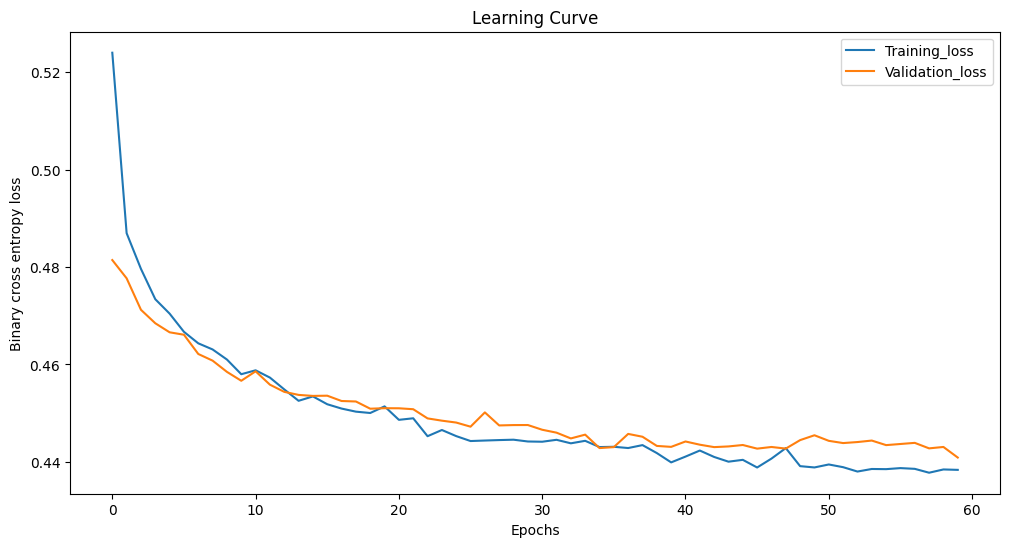

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(hist.history['loss'], label='Training_loss')
plt.plot(hist.history['val_loss'], label='Validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Binary cross entropy loss")
plt.title("Learning Curve")
plt.legend()
plt.show()

In [26]:
model.evaluate(xtrain, ytrain)

1053/1053 [==============================] - 6s 5ms/step - loss: 0.4207 - accuracy: 0.8120


[0.42068836092948914, 0.811995267868042]

In [27]:
model.evaluate(xtest, ytest)

264/264 [==============================] - 2s 8ms/step - loss: 0.4292 - accuracy: 0.8090


[0.42920610308647156, 0.8090261220932007]

### Get predictions for train and test

In [28]:
yprob_train = model.predict(xtrain)
yprob_test = model.predict(xtest)

264/264 [==============================] - 1s 2ms/step


In [29]:
yprob_train[0:5]

array([[0.00686804],
       [0.19545949],
       [0.8229473 ],
       [0.8262944 ],
       [0.84110546]], dtype=float32)

In [30]:
ytrain.head()

,booking_status
15559,0
32783,0
11797,1
39750,1
28711,1


In [31]:
ypred_train = [1 if prob>=0.5 else 0 for prob in yprob_train]
ypred_test = [1 if prob>=0.5 else 0 for prob in yprob_test]

In [32]:
yprob_train[0:5]

array([[0.00686804],
       [0.19545949],
       [0.8229473 ],
       [0.8262944 ],
       [0.84110546]], dtype=float32)

In [33]:
ytest.head()

,booking_status
8768,0
38340,1
7104,0
36898,0
9747,0


In [34]:
ypred_test[0:5]

[0, 1, 0, 0, 0]

In [35]:
yprob_test[0:5]

array([[0.05033273],
       [0.90128875],
       [0.44737163],
       [0.0115756 ],
       [0.16779193]], dtype=float32)

### Confusion Matrix

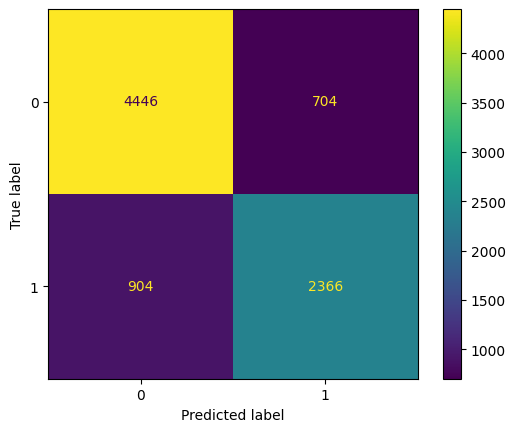

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(ytest, ypred_test)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85      5150
           1       0.77      0.72      0.75      3270

    accuracy                           0.81      8420
   macro avg       0.80      0.79      0.80      8420
weighted avg       0.81      0.81      0.81      8420



In [40]:
from sklearn.metrics import roc_auc_score
roc_auc_score(ytest, yprob_test)

0.8772833348178499

### ROC_AUC_Score is more than 80% hence it is good model

### Out of Sample predictions

In [39]:
url2 = "https://raw.githubusercontent.com/vaishaliraut/DeepLearningDemo/main/booking_test.csv"
xnew = pd.read_csv(url2)
xnew.head()

,id,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,42100,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,42101,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,42102,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,42103,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,42104,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [41]:
xnew2 = xnew.drop(columns=['id'])
xnew2.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,3,0,1,4,0,0,1,111,2018,12,5,1,0,0,0,115.60,2
1,2,0,0,3,0,0,0,22,2017,10,21,0,0,0,0,85.00,0
2,2,2,0,1,0,0,3,18,2018,8,10,1,0,0,0,240.00,1
3,2,0,0,3,0,0,0,88,2018,5,30,0,0,0,0,80.75,0
4,1,0,0,2,2,0,0,7,2018,9,21,1,0,0,0,144.00,0


In [42]:
xnew2_pre = num_pipe.transform(xnew2)
xnew2_pre.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
0,2.056005,-0.313454,0.130259,1.122386,-0.407020,-0.160945,0.685890,0.087728,0.409661,1.557404,-1.226638,0.428551,-0.173408,-0.060506,-0.101479,0.297092,1.842849
1,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-1.010111,-2.441040,0.850531,0.573445,-1.149928,-0.173408,-0.060506,-0.101479,-0.526846,-0.737691
2,0.151040,4.129777,-0.998814,-0.979466,-0.407020,-0.160945,3.088017,-1.059452,0.409661,0.143658,-0.664112,0.428551,-0.173408,-0.060506,-0.101479,3.646696,0.552579
3,0.151040,-0.313454,-0.998814,0.421768,-0.407020,-0.160945,-0.515173,-0.195983,0.409661,-0.916652,1.585992,-1.149928,-0.173408,-0.060506,-0.101479,-0.641282,-0.737691
4,-1.753925,-0.313454,-0.998814,-0.278849,2.996268,-0.160945,-0.515173,-1.195140,0.409661,0.497095,0.573445,0.428551,-0.173408,-0.060506,-0.101479,1.061793,-0.737691


In [43]:
probs = model.predict(xnew2_pre)

878/878 [==============================] - 2s 2ms/step


In [44]:
probs[0:5]

array([[0.05683017],
       [0.03763754],
       [0.4256256 ],
       [0.17205665],
       [0.59688276]], dtype=float32)

In [45]:
preds = [1 if prob>=0.5 else 0 for prob in probs]
preds[0:5]

[0, 0, 0, 0, 1]

In [46]:
df_final = xnew[['id']]
df_final['booking_status'] = preds
df_final['probability'] = probs

In [47]:
df_final

,id,booking_status,probability
0,42100,0,0.056830
1,42101,0,0.037638
2,42102,0,0.425626
3,42103,0,0.172057
4,42104,1,0.596883
...,...,...,...
28063,70163,1,0.972416
28064,70164,0,0.062604
28065,70165,0,0.160264
28066,70166,0,0.496306


In [48]:
df_final['booking_status'].value_counts()

booking_status
0    17886
1    10182
Name: count, dtype: int64

<Axes: xlabel='booking_status'>

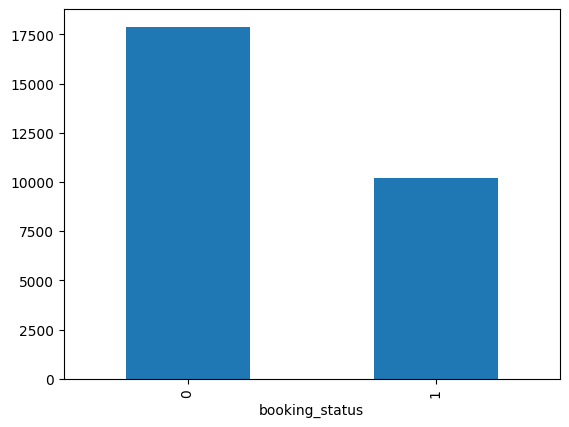

In [49]:
df_final['booking_status'].value_counts().plot(kind='bar')

In [50]:
df_final.to_csv("BookingResults_BinaryClassification.csv", index=False)